In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('TASK_ONE.xlsx')
df.head()

,Unnamed: 0,slno,name,course,cgpa,study_hrs,screen_hrs,placement
0,NaN,1,arun,dac,8.0,10,1.0,placed
1,NaN,2,basu,emb,5.0,5,8.0,not placed
2,NaN,3,hari,web,10.0,10,1.0,placed
3,NaN,4,manish,dbda,6.0,2,6.0,not placed
4,NaN,5,prashanth,cdac,10.0,8,2.0,placed


In [3]:
df.columns

Index(['Unnamed: 0', 'slno', 'name', 'course', 'cgpa', 'study_hrs',
       'screen_hrs', 'placement'],
      dtype='object')

In [4]:
df1 = df[['cgpa', 'study_hrs','screen_hrs', 'placement']]
df1['placement'] = np.where(df['placement'] == 'placed',1,0)
df1.head()

C:\Users\dbda\AppData\Local\Temp\ipykernel_7020\1848628215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['placement'] = np.where(df['placement'] == 'placed',1,0)


,cgpa,study_hrs,screen_hrs,placement
0,8.0,10,1.0,1
1,5.0,5,8.0,0
2,10.0,10,1.0,1
3,6.0,2,6.0,0
4,10.0,8,2.0,1


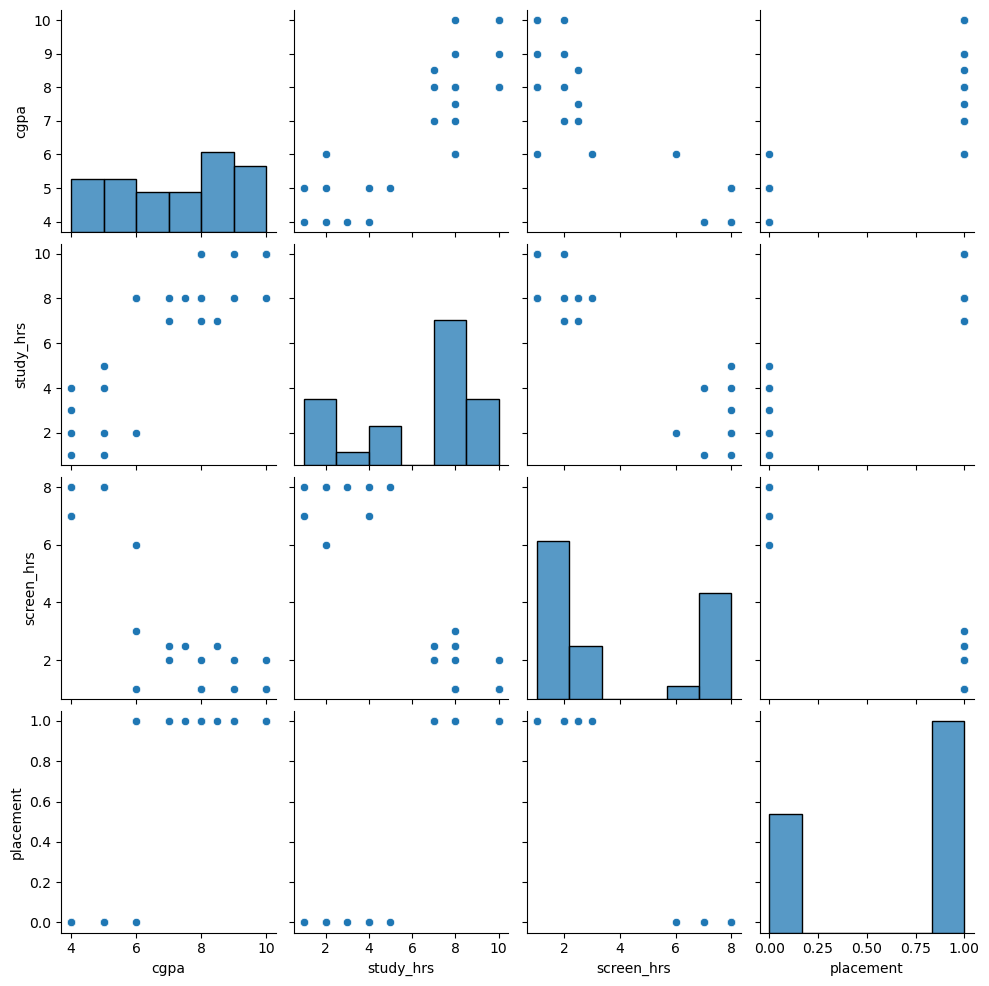

In [5]:
sns.pairplot(df1)
plt.show()

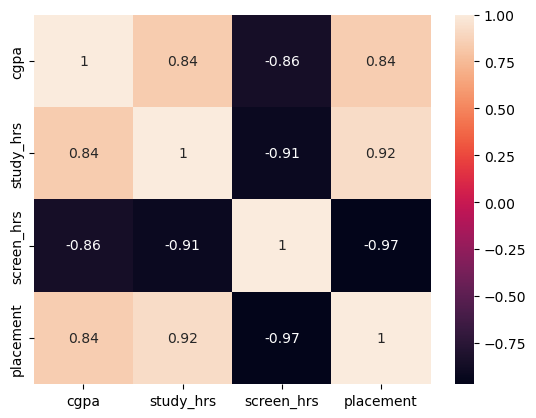

In [6]:
sns.heatmap(df1.corr(),annot= True)
plt.show()

In [7]:
x= df1[['cgpa', 'study_hrs','screen_hrs']]
y = df1['placement']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 50)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)
print(f'Training Score : {training_score} \nTesting Score : {testing_score}')

Training Score : 1.0 
Testing Score : 1.0


In [12]:
yhat = model.predict(x_test)

In [13]:
cfmat = confusion_matrix(y_test,yhat)
print(cfmat)

[[2 0]
 [0 6]]


In [14]:
clrep = classification_report(y_test,yhat)
print(clrep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [15]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [16]:
x1 = np.random.randint(100,500,size = 500)
x2 = np.random.randint(100,500,size = 500)
x3 = np.random.randint(100,500,size = 500)
y = np.random.randint(0,3,size = 500)

In [17]:
temp = pd.DataFrame({'a':x1,'b':x2,'c':x3,'y':y})

In [18]:
temp.to_csv('svm_data.csv',index = False)